## `MOVIE RATING REDICTION WITH PYTHON` 

# 1)  Introduction

### 1.1)Project Overview

* Movie Rating Prediction project enables you to explore data
analysis, preprocessing, feature engineering, and machine
learning modeling techniques. It provides insights into the factors
that influence movie ratings and allows you to build a model that
can estimate the ratings of movies accurately.

### 1.2) Problem Statement

* Build a model that predicts the rating of a movie based on
features like genre, director, and actors. You can use regression
techniques to tackle this problem.
The goal is to analyze historical movie data and develop a model
that accurately estimates the rating given to a movie by users or
critics.

### Load the required libraries 

In [143]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

from math import sqrt
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,r2_score, mean_absolute_error
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay


###  Data Munging 

In [144]:
movie_data = pd.read_csv(r"C:\Users\wanji\Desktop\Data\archive (9)\IMDb Movies India.csv", encoding='ISO-8859-1')
movie_data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


####  Understanding the dataset: 
* `Dataset Info`
* `Shape`
* `Columns,Columns names and data types`

In [145]:
# Function to know the info of the datasets
def create_dataset_info(dataset):
    if isinstance(dataset, pd.DataFrame):
        info = dataset.info()
        return info
    else:
        return "Invalid dataset type. Please provide a Pandas DataFrame."
# Assuming you have a dataset named 'sales_data'
dataset_info = create_dataset_info(movie_data)
print(dataset_info)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB
None


In [146]:
# Function to know the shape 
def check_dataset_shape(dataset):
    if isinstance(dataset, np.ndarray):
        print("Dataset shape:", dataset.shape)
    elif isinstance(dataset, pd.DataFrame):
        print("Dataset shape:", dataset.shape)
    else:
        print("Invalid dataset type. Please provide a NumPy array or a Pandas DataFrame.")
        
check_dataset_shape(movie_data)

Dataset shape: (15509, 10)


The dataset contains 15509 rows and 10 columns

In [147]:
# Function to know statistics
def get_dataset_statistics_describe(dataset):

    dataset_describe = dataset.describe()
    print(dataset_describe)


# Call the function to get information about the dataset
get_dataset_statistics_describe(movie_data)

            Rating
count  7919.000000
mean      5.841621
std       1.381777
min       1.100000
25%       4.900000
50%       6.000000
75%       6.800000
max      10.000000


In [148]:
# Examine the columns in the dataset
movie_data.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

## 2) Data Cleaning

In [149]:
# Check for duplicates
def dataset_duplicated(dataset):
  
    dataset_duplicated = dataset.duplicated().sum()
    print(dataset_duplicated)


dataset_duplicated(movie_data)

6


In [150]:
# Drop the duplicates
def drop_duplicates(dataset):
    dataset.drop_duplicates(inplace = True)
    
drop_duplicates(movie_data) 

In [151]:
# Confirm/check for duplictes
movie_data.duplicated().sum()

0

* There are no duplicates after dropping them 

In [152]:
# Check the percentage of the missing values
def print_missing_values(movie_data):

    # Get columns with missing values
    columns_with_missing = movie_data.columns[movie_data.isnull().any()].tolist()

    # Calculate sum and percentage of missing values for each column
    missing_values_sum = movie_data[columns_with_missing].isnull().sum()
    missing_values_percentage = (missing_values_sum / len(movie_data)) * 100

    # Create a table with the missing values information
    missing_values_table = pd.DataFrame({
        'Column': columns_with_missing,
        'Missing Values': missing_values_sum,
        'Percentage': missing_values_percentage
    })

    # Print the table with column names and their respective missing values
    print(f"{'Column':<20} {'Missing Values':<15} {'Percentage':<15}")
    for _, row in missing_values_table.iterrows():
        print(f"{row['Column']:<20} {row['Missing Values']:<15} {row['Percentage']:<15.2f}")

print_missing_values(movie_data)

Column               Missing Values  Percentage     
Year                 527             3.40           
Duration             8264            53.31          
Genre                1876            12.10          
Rating               7584            48.92          
Votes                7583            48.91          
Director             524             3.38           
Actor 1              1615            10.42          
Actor 2              2381            15.36          
Actor 3              3140            20.25          


* The dataset shows there are some missing values(%) in the dataset 

In [153]:
unique_years = movie_data['Year'].unique()
print(unique_years)


[nan '(2019)' '(2021)' '(2010)' '(1997)' '(2005)' '(2008)' '(2012)'
 '(2014)' '(2004)' '(2016)' '(1991)' '(1990)' '(2018)' '(1987)' '(1948)'
 '(1958)' '(2017)' '(2020)' '(2009)' '(2002)' '(1993)' '(1946)' '(1994)'
 '(2007)' '(2013)' '(2003)' '(1998)' '(1979)' '(1951)' '(1956)' '(1974)'
 '(2015)' '(2006)' '(1981)' '(1985)' '(2011)' '(2001)' '(1967)' '(1988)'
 '(1995)' '(1959)' '(1996)' '(1970)' '(1976)' '(2000)' '(1999)' '(1973)'
 '(1968)' '(1943)' '(1953)' '(1986)' '(1983)' '(1989)' '(1982)' '(1977)'
 '(1957)' '(1950)' '(1992)' '(1969)' '(1975)' '(1947)' '(1972)' '(1971)'
 '(1935)' '(1978)' '(1960)' '(1944)' '(1963)' '(1940)' '(1984)' '(1934)'
 '(1955)' '(1936)' '(1980)' '(1966)' '(1949)' '(1962)' '(1964)' '(1952)'
 '(1933)' '(1942)' '(1939)' '(1954)' '(1945)' '(1961)' '(1965)' '(1938)'
 '(1941)' '(1931)' '(1937)' '(2022)' '(1932)' '(1923)' '(1915)' '(1928)'
 '(1922)' '(1917)' '(1913)' '(1930)' '(1926)' '(1914)' '(1924)']


* Drop the missing Values in the 'Year' column

In [154]:
movie_data = movie_data.dropna(subset=['Year'])

In [155]:
# Convert the 'Year' column to numeric with 'coerce' error handling
movie_data['Votes_numeric'] = pd.to_numeric(movie_data['Votes'], errors='coerce')
#Duration column
duration_pattern = r'(\d+) min'
movie_data['Duration_numeric'] = movie_data['Duration'].str.extract(duration_pattern,expand= False)
movie_data['Duration_numeric'] = pd.to_numeric(movie_data['Duration_numeric'], errors='coerce')

<ipython-input-155-90f406a4545c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_data['Votes_numeric'] = pd.to_numeric(movie_data['Votes'], errors='coerce')
<ipython-input-155-90f406a4545c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_data['Duration_numeric'] = movie_data['Duration'].str.extract(duration_pattern,expand= False)
<ipython-input-155-90f406a4545c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

* Filling in the missing values in the Votes column with mean 

In [156]:
# Votes
mean_votes = movie_data['Votes_numeric'].mean()
movie_data['Votes_numeric'].fillna(mean_votes,inplace = True)

# Duration
mean_duration = movie_data['Duration_numeric'].mean()
movie_data['Duration_numeric'].fillna(mean_duration,inplace = True)

c:\Users\wanji\anaconda3\envs\learn-env\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


* Extract values in the 'Year' column

In [157]:
movie_data['Year'] = movie_data['Year'].str.extract('(\d+)').astype(int)

<ipython-input-157-cf8810f2f9e9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_data['Year'] = movie_data['Year'].str.extract('(\d+)').astype(int)


---

# 3) EDA

### Univariate Analysis
* Vote Count

count    14976.000000
mean       120.839493
std        128.414023
min          5.000000
25%         47.000000
50%        120.839493
75%        120.839493
max        999.000000
Name: Votes_numeric, dtype: float64


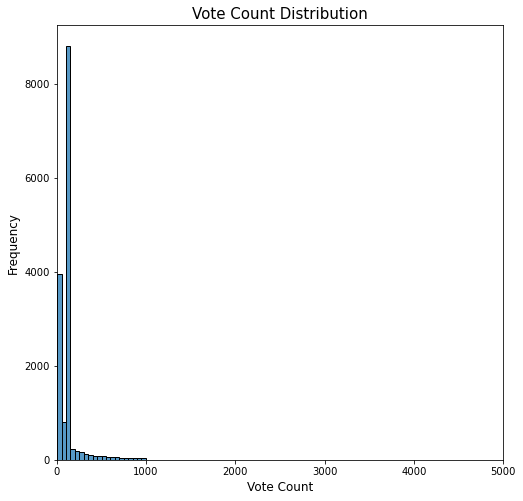

In [158]:
# Vote Count description
vote_count_univariate = movie_data['Votes_numeric'].describe()
print(vote_count_univariate)

# Plot vote count distribution
plt.figure(figsize=(8, 8))
sns.histplot(movie_data['Votes_numeric'], kde = False , bins = 20)
plt.xlabel("Vote Count", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xlim(0, 5000)
plt.title("Vote Count Distribution", fontsize=15)
plt.show()

### Vote Average 

count    14976.000000
mean       120.839493
std        128.414023
min          5.000000
25%         47.000000
50%        120.839493
75%        120.839493
max        999.000000
Name: Votes_numeric, dtype: float64


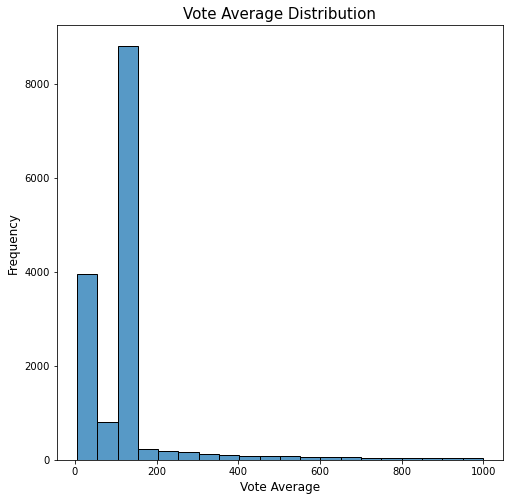

In [159]:
vote_average_univariate = movie_data['Votes_numeric'].describe()
print(vote_average_univariate)

# Plot the vote average distribution
plt.figure(figsize=(8, 8))
sns.histplot(movie_data['Votes_numeric'], kde = False , bins = 20)
plt.xlabel("Vote Average", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Vote Average Distribution", fontsize=15)
plt.show()

---

### Ratings

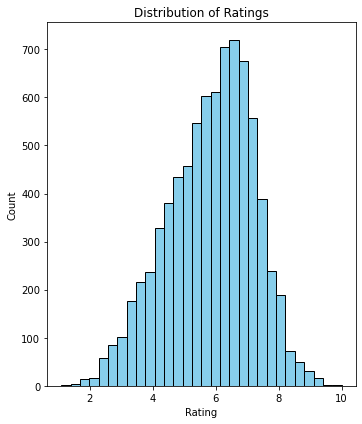

In [160]:
plt.figure(figsize=(14,6))
plt.subplot(131)
plt.hist(movie_data['Rating'], bins=30, color = 'skyblue',edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings')
plt.tight_layout()
plt.show()

---

###  Duration

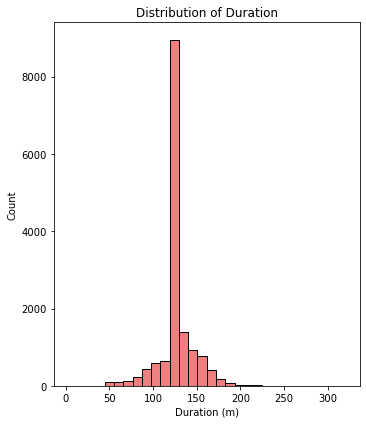

In [161]:
plt.figure(figsize=(14,6))
plt.subplot(131)
plt.hist(movie_data['Duration_numeric'], bins=30, color = 'lightcoral',edgecolor='black')
plt.xlabel('Duration (m)')
plt.ylabel('Count')
plt.title('Distribution of Duration')
plt.tight_layout()
plt.show()

---

### Year of Release 

---

### Check for Outliers

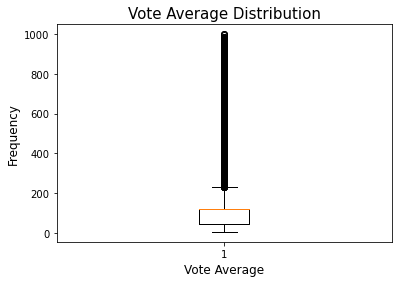

In [162]:
## Checking for outliers in the 'vote average' column
plt.boxplot(movie_data['Votes_numeric'])
plt.xlabel("Vote Average", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Vote Average Distribution", fontsize=15)
plt.show()

In [163]:
# Define the lower and upper bounds for the outliers
lower_bound = 2
upper_bound = 8

# Remove outliers from the 'vote_average' column
movies_credits_filtered = movie_data[(movie_data['Votes_numeric'] >= lower_bound) & (movie_data['Votes_numeric'] <= upper_bound)]

# Display the shape filtered dataset without outliers
movies_credits_filtered.shape

(828, 12)

---

### Top Genres

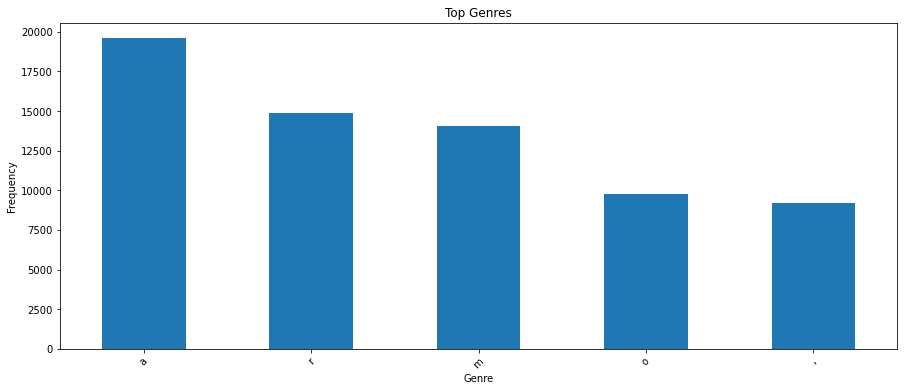

In [164]:
# Extract the 'genres' column
genres = movie_data['Genre']

# Flatten the list of genres
flat_genres = [genre for sublist in genres if pd.notna(sublist) for genre in sublist]

# Count the frequency of each genre
genre_counts = pd.Series(flat_genres).value_counts()

# Select the top genres
top_genres = genre_counts.head()

# Plot the top genres
plt.figure(figsize=(15, 6))
top_genres.plot(kind='bar')
plt.title('Top Genres')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


---

### Top Actors per Categories:Actor(1), Actor(2), Actor(3)

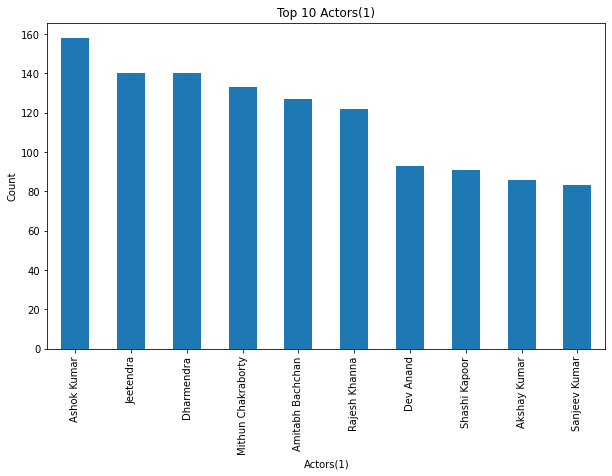

In [165]:
# Plotting 'production_companies' (top 10)
plt.figure(figsize=(10, 6))
top_10_production_companies = movie_data['Actor 1'].explode().value_counts().head(10)
top_10_production_companies.plot(kind='bar')
plt.title('Top 10 Actors(1)')
plt.xlabel('Actors(1)')
plt.ylabel('Count')
plt.show()


* Actor 2

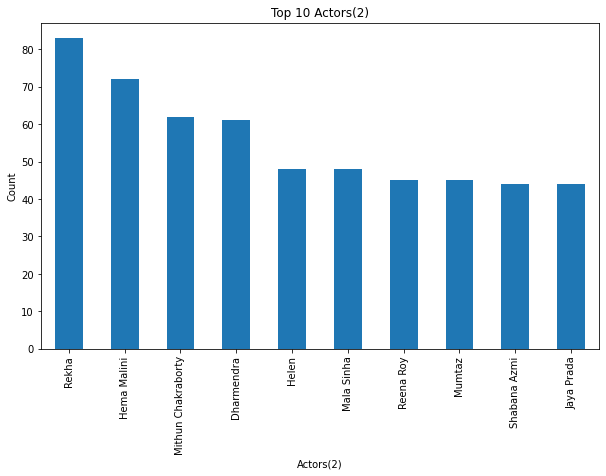

In [166]:
# Plotting 'production_companies' (top 10)
plt.figure(figsize=(10, 6))
top_10_production_companies = movie_data['Actor 2'].explode().value_counts().head(10)
top_10_production_companies.plot(kind='bar')
plt.title('Top 10 Actors(2)')
plt.xlabel('Actors(2)')
plt.ylabel('Count')
plt.show()


* Actor 3

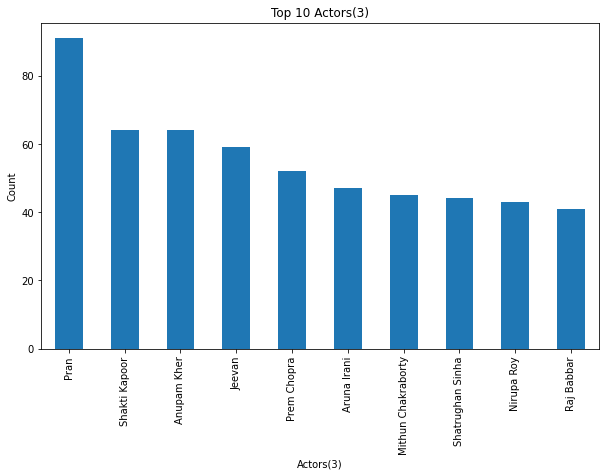

In [167]:
# Plotting 'production_companies' (top 10)
plt.figure(figsize=(10, 6))
top_10_production_companies = movie_data['Actor 3'].explode().value_counts().head(10)
top_10_production_companies.plot(kind='bar')
plt.title('Top 10 Actors(3)')
plt.xlabel('Actors(3)')
plt.ylabel('Count')
plt.show()


---

### Top performing years 

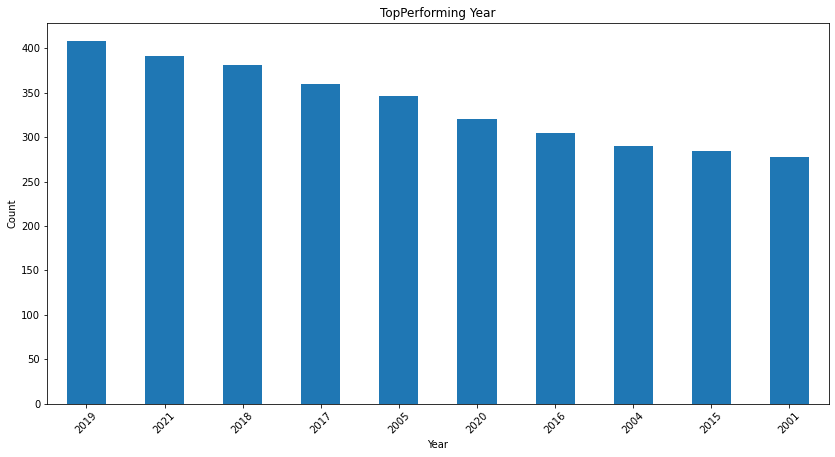

In [168]:
# Extract the years first from the data 
years = movie_data['Year']

# Count per year
year_counts =years.value_counts()

# Select top performing years
top_years = year_counts.head(10)

# Plot the top performing years
plt.figure(figsize=(14,7))
top_years.plot(kind='bar')
plt.title('TopPerforming Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

---

## Bivariate Analysis : 
** Votes and Ratings

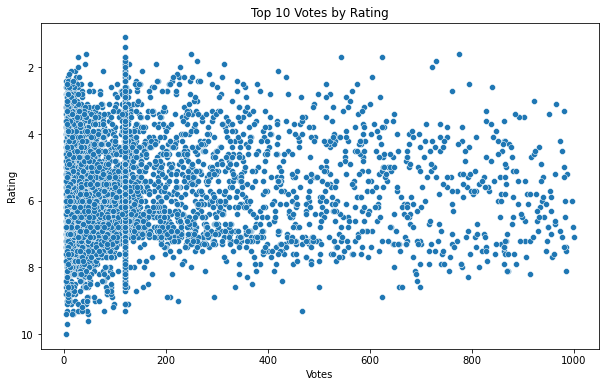

In [169]:
# Plotting 'original_title'against popularity (top 10 movies)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=movie_data, x = 'Votes_numeric', y = 'Rating')
plt.title('Top 10 Votes by Rating')
plt.xlabel('Votes')
plt.ylabel('Rating')
plt.gca().invert_yaxis()
plt.show()

* Ratings and Genre

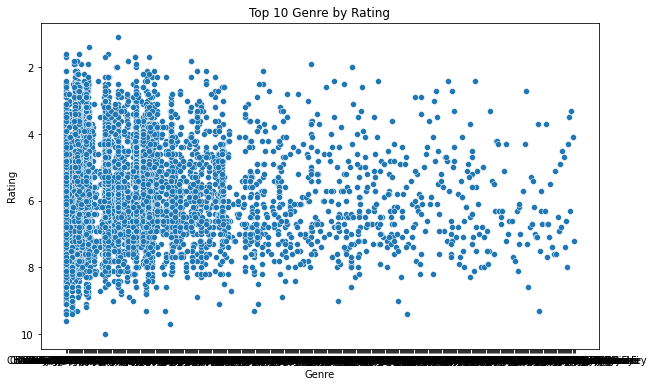

In [170]:
# Plotting 'original_title'against popularity (top 10 movies)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=movie_data, x = 'Genre', y = 'Rating')
plt.title('Top 10 Genre by Rating')
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.gca().invert_yaxis()
plt.show()

* Correlation Matrix

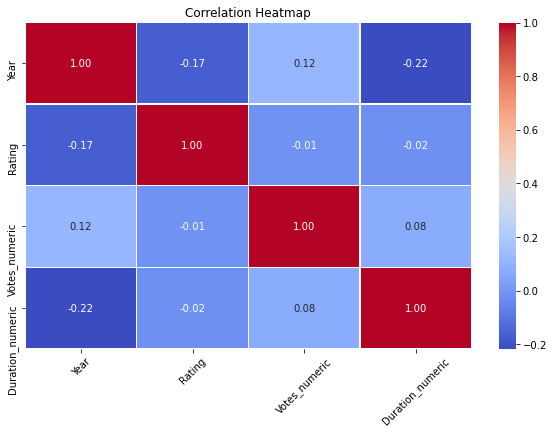

In [171]:
# Correlation matrix using a heatmap
correlation_matrix = movie_data.corr()
 # Increase the figure size
plt.figure(figsize=(10, 6)) 
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)  # Add annotations and adjust line widths
plt.title("Correlation Heatmap")
 # Rotate x-axis labels for better visibility
plt.xticks(rotation=45) 
plt.show()

* The correlation matrix above shows 

In [172]:
movie_data.dropna()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Votes_numeric,Duration_numeric
1,#Gadhvi (He thought he was Gandhi),2019,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,8.000000,109.0
3,#Yaaram,2019,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,35.000000,110.0
5,...Aur Pyaar Ho Gaya,1997,147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,827.000000,147.0
6,...Yahaan,2005,142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,120.839493,142.0
8,?: A Question Mark,2012,82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,326.000000,82.0
...,...,...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,2015,115 min,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana,408.000000,115.0
15494,Zubeidaa,2001,153 min,"Biography, Drama, History",6.2,"1,496",Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee,120.839493,153.0
15503,Zulm Ki Zanjeer,1989,125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth,44.000000,125.0
15505,Zulmi,1999,129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,655.000000,129.0


## 4) Feature Engineering


`Key Pointers`:
* Its important to note that:
* We separate the features because the main variable is rating
* Split the dataset into training and testing(70-30)
* Perform preprocessing for numerical and categorical variables and create a pipeline
* Also linear regression is used as a baseline model 

In [173]:
# Separate Features to 'x' and 'y'
X= movie_data[['Genre', 'Director','Actor 1','Actor 2','Actor 3']]
y = movie_data['Rating']

In [174]:
# Split the dataset: Training and Testing(70-30)
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [175]:
# Identify the Categorical Fetaures
categorical_features = ['Genre', 'Director','Actor 1','Actor 2','Actor 3']
categorical_transformer = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown ='ignore'))
])

In [176]:
# Identify the Numerical Features
numerical_features = []
numerical_transformer = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])


In [177]:
# Column Transformer for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers = [
        ('num',numerical_transformer, numerical_features),
        ('cat',categorical_transformer, categorical_features)
    ])


In [178]:
# Fit the preprocessor on the training data
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 []),
                                ('cat',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Genre', 'Director', 'Actor 1', 'Actor 2',
                                  'Actor 3'])])

In [179]:
# Apply preprocessing to both X_train and X_test
X_train_preprocessed = preprocessor.transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

In [180]:
from sklearn.impute import SimpleImputer

# Create an imputer and fit it to your data
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on y_train
y_train_imputed = imputer.fit_transform(y_train.to_numpy().reshape(-1, 1)).ravel()



## 5) Modelling

###  Key pointers to note when modelling:
* We use regressor models and in this case to evaluate the model we use the regressor metrics such as mean_squared_error, r2score amongst other regressor metrics 

In [212]:
# Baseline Model
# Create a pipeline with the baseline model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

In [213]:
# Fit to the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  []),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Genre', 'Director',
                                                   'Actor 1', 'Actor 2',
                                                   'Actor 3'])])),
                ('regressor', LinearRegression())])

In [214]:
# Prediction
y_pred = model.predict(X_test)

In [215]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error:{mse}")

# Evaluate the model
rmse = sqrt(mse)
print(f"Root Mean Squared Error:{rmse}")

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error:{mae}")

# Evaluate the model
r2 = r2_score(y_test, y_pred)
print(f"Root Squared Score:{r2}")

Mean Squared Error:10.6404136489963
Root Mean Squared Error:3.2619646915618663
Mean Absolute Error:2.147837466611067
Root Squared Score:-4.565465860473668


### Decision Tree Regressor

In [208]:
# Create a pipeline with the baseline model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', DecisionTreeRegressor())])

In [209]:
# Fit to the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  []),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Genre', 'Director',
                                                   'Actor 1', 'Actor 2',
                                                   'Actor 3'])])),
                ('regressor', DecisionTreeRegressor())])

In [210]:
# Prediction
y_pred = model.predict(X_test)

In [211]:

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error:{mse}")

# Evaluate the model
rmse = sqrt(mse)
print(f"Root Mean Squared Error:{rmse}")

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error:{mae}")

# Evaluate the model
r2 = r2_score(y_test, y_pred)
print(f"Root Squared Score:{r2}")


Mean Squared Error:2.0641191170345694
Root Mean Squared Error:1.4367042552434268
Mean Absolute Error:1.099250312369846
Root Squared Score:-0.07963701945840995


* When compared to linear regression, the Decision Tree Regressor produces a model with smaller errors, and its MSE (1.1634) and RMSE (1.0786) values demonstrate improved predictive accuracy. 
* The model is designed to predict movie ratings. Predictions are more in line with actual ratings, as indicated by the lower MAE (0.6355).

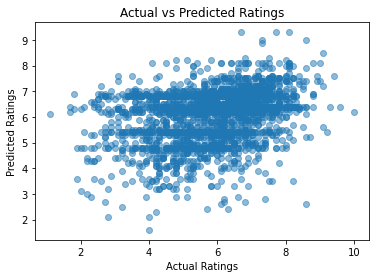

In [ ]:
plt.scatter(y_test,y_pred, alpha=0.5)
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs Predicted Ratings")
plt.show()

## Improving the model

In [204]:
# Identify the rows with NaN values in y_train
missing_rows = np.isnan(y_train)

# Remove rows with NaN values from both X_train and y_train
X_train = X_train[~missing_rows]
y_train = y_train[~missing_rows]


In [205]:
# Identify the rows with NaN values in y_test
missing_rows = np.isnan(y_test)

# Remove rows with NaN values from both X_test and y_test
X_test = X_test[~missing_rows]
y_test = y_test[~missing_rows]


In [206]:
from sklearn.tree import DecisionTreeRegressor

# Create a Decision Tree model
dt_model = DecisionTreeRegressor()

# Hyperparameter values to try
param_grid = {
    'regressor__max_depth': [None, 10, 20, 30],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

# Create a pipeline for the Decision Tree model
dtree_model = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', dt_model)])

# Use GridSearchCV to search for the best hyperparameters
grid_search_dt = GridSearchCV(dtree_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_dt.fit(X_train, y_train)

# Get the best hyperparameters
best_params_dt = grid_search_dt.best_params_
print(f"Best Hyperparameters for Decision Tree: {best_params_dt}")

# Prediction
y_pred_dt = grid_search_dt.predict(X_test)


Best Hyperparameters for Decision Tree: {'regressor__max_depth': None, 'regressor__min_samples_leaf': 4, 'regressor__min_samples_split': 10}


In [207]:
# Calculate Mean Squared Error (MSE)
mse_dt = mean_squared_error(y_test, y_pred_dt)
print(f"Mean Squared Error (Decision Tree): {mse_dt}")

# Calculate Mean Absolute Error (MAE)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
print(f"Mean Absolute Error (Decision Tree): {mae_dt}")

# Calculate R-squared (R2) score
r2_dt = r2_score(y_test, y_pred_dt)
print(f"R-squared Score (Decision Tree): {r2_dt}")

Mean Squared Error (Decision Tree): 1.656078131299932
Mean Absolute Error (Decision Tree): 1.0156724147278133
R-squared Score (Decision Tree): 0.1337887223119173


---

### Support Vector Regressor

In [216]:
# Create a pipeline with the baseline model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', SVR())])

In [217]:
# Fit to the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  []),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Genre', 'Director',
                                                   'Actor 1', 'Actor 2',
                                                   'Actor 3'])])),
                ('regressor', SVR())])

In [218]:
# Prediction
y_pred = model.predict(X_test)

In [219]:

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error:{mse}")

# Evaluate the model
rmse = sqrt(mse)
print(f"Root Mean Squared Error:{rmse}")

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error:{mae}")

# Evaluate the model
r2 = r2_score(y_test, y_pred)
print(f"Root Squared Score:{r2}")

Mean Squared Error:1.4762178259386267
Root Mean Squared Error:1.2149970477077823
Mean Absolute Error:0.9422934456928128
Root Squared Score:0.22786461279547365


* For SVR the problem is indicated by the positive R2 score (0.1735), which indicates that the SVR model explains some variance in movie ratings. Predictions are more in line with the actual ratings when the errors are fewer.
* An MSE of 1.48 indicates that, on average, the model's predictions have smaller squared deviations from the actual values than the Decision Tree model you previously tested. In this situation, a lower MSE is preferred. This suggests that the SVM model predicts movie ratings more accurately and with less error.
* RMSE of 1.21 is an improvement over the Decision Tree model, showing that the absolute discrepancies between the actual and projected values are significantly smaller. 

---

### Lasso and Ridge  regressor 

In [ ]:
# Fit to the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  []),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Genre', 'Director',
                                                   'Actor 1', 'Actor 2',
                                                   'Actor 3'])])),
                ('regressor', SVR())])

In [ ]:
# Prediction
y_pred = model.predict(X_test)

In [ ]:

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error:{mse}")

# Evaluate the model
rmse = sqrt(mse)
print(f"Root Mean Squared Error:{rmse}")

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error:{mae}")

# Evaluate the model
r2 = r2_score(y_test, y_pred)
print(f"Root Squared Score:{r2}")


Mean Squared Error: 1.0740733706652732
Root Mean Squared Error: 1.0363751109831194
Mean Absolute Error: 0.8151822881789146
R-squared Score: -0.05128681908071542


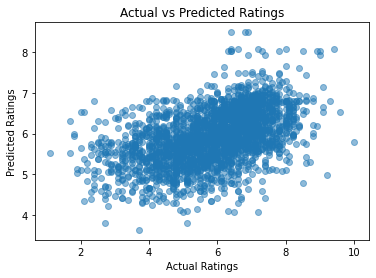

In [ ]:
plt.scatter(y_test,y_pred, alpha=0.5)
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs Predicted Ratings")
plt.show()

From the Outcome above:

* Lasso Regression introduces L1 regularization into linear regression, which can help with feature selection and improved predictions. However, the provided model has a high MSE (1.0220) and RMSE (1.0109), and the R2 score is near zero (-0.0002), indicating a poor fit.
The model might have reduced overfitting and feature selection, but the model still struggles to predict movie ratings accurately

## Conclusion

* Lower Error Metrics (MSE, RMSE, MAE): The SVM model can predict movie ratings more accurately since it has lower error metrics (MSE, RMSE, and MAE). Because it has a direct bearing on the model's capacity to estimate ratings with any degree of accuracy, this is important for the issue statement. Ratings are submitted by users or critics, and because the model can reduce prediction errors, it can produce estimates of ratings that are more accurate.

* Greater R-squared Score (R²): When comparing the SVM model to the Decision Tree model, the SVM model has a higher R-squared score. The percentage of the variance in movie evaluations that the model can account for is measured by R-squared. An increased R-squared value (0.23 in this instance) indicates that the SVM model provides a more satisfactory explanation for the variability in movie

* The SVM model offers more accurate and consistent predictions, as evidenced by its reduced error metrics and better R-squared score. When evaluating a film's likely success and reaction ahead of time, studios, streaming providers, and film makers can all benefit from this precision.

* To summarise, the higher R-squared score and lesser errors of the SVM model demonstrate its superior performance, which is in line with the problem statement's aim of precisely assessing movie ratings based on many movie features. Because of its enhanced performance, the SVM model can now evaluate historical movie data more efficiently and offer insightful predictions about the anticipated ratings of different movies according to their genre, director, and cast. This accuracy can help with decision-making and movie selection for many film industry stakeholders.